In [43]:
!pip install keras

In [44]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2
import os

In [45]:
## Parametre tanımlama

In [46]:
batch_size = 32 
num_classes = 10
epochs = 100 # 93. epoch'tan sonra kayıp fonksiyonu degeri sabit kalmaya basliyor

In [47]:
#Veri setini Keras ile aktarma

In [48]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [49]:
#Veri setini ve gorselini yakindan inceleyelim.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

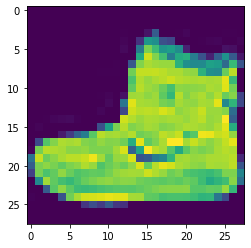

In [50]:
import matplotlib.pyplot as plt

print(x_train[0])
plt.imshow(x_train[0])
plt.show()

In [51]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
input_shape = (28, 28, 1)

In [52]:
#Veri setini Numpy'den kategorik matriks yapısına çevirme

In [53]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [54]:
#Model Oluşturma

In [55]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.01), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (5, 5), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [56]:
#Optimize islemleri

In [57]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [58]:
#Veri setimizdeki resimleri oluşturan matriksleri normalize etme

In [59]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [61]:
#Model egitimi

In [62]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/100
1875/1875 [==============================] - 245s 131ms/step - loss: 0.7506 - accuracy: 0.7774 - val_loss: 0.5628 - val_accuracy: 0.8319
Epoch 2/100
1875/1875 [==============================] - 240s 128ms/step - loss: 0.5380 - accuracy: 0.8393 - val_loss: 0.4740 - val_accuracy: 0.8592
Epoch 3/100
1875/1875 [==============================] - 238s 127ms/step - loss: 0.4934 - accuracy: 0.8529 - val_loss: 0.4374 - val_accuracy: 0.8705
Epoch 4/100
1875/1875 [==============================] - 245s 131ms/step - loss: 0.4657 - accuracy: 0.8598 - val_loss: 0.4291 - val_accuracy: 0.8709
Epoch 5/100
1875/1875 [==============================] - 257s 137ms/step - loss: 0.4484 - accuracy: 0.8649 - val_loss: 0.3985 - val_accuracy: 0.8825
Epoch 6/100
1875/1875 [==============================] - 252s 134ms/step - loss: 0.4376 - accuracy: 0.8686 - val_loss: 0.4147 - val_accuracy: 0.8777
Epoch 7/100
1875/1875 [==============================] - 253s 135ms/step - loss: 0.4232 - accuracy: 0.8735

Epoch 56/100
1875/1875 [==============================] - 218s 116ms/step - loss: 0.3392 - accuracy: 0.9014 - val_loss: 0.3329 - val_accuracy: 0.9072
Epoch 57/100
1875/1875 [==============================] - 221s 118ms/step - loss: 0.3377 - accuracy: 0.9014 - val_loss: 0.3438 - val_accuracy: 0.8965
Epoch 58/100
1875/1875 [==============================] - 217s 116ms/step - loss: 0.3390 - accuracy: 0.9018 - val_loss: 0.3429 - val_accuracy: 0.9013
Epoch 59/100
1875/1875 [==============================] - 219s 117ms/step - loss: 0.3392 - accuracy: 0.9020 - val_loss: 0.3253 - val_accuracy: 0.9068
Epoch 60/100
1875/1875 [==============================] - 225s 120ms/step - loss: 0.3426 - accuracy: 0.9010 - val_loss: 0.3403 - val_accuracy: 0.9031
Epoch 61/100
1875/1875 [==============================] - 215s 115ms/step - loss: 0.3402 - accuracy: 0.9010 - val_loss: 0.3263 - val_accuracy: 0.9077
Epoch 62/100
1875/1875 [==============================] - 224s 119ms/step - loss: 0.3376 - accuracy:

In [63]:
#Performans ölcümü

In [64]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.3454 - accuracy: 0.8971
Test loss: 0.34539052844047546
Test accuracy: 0.8970999717712402


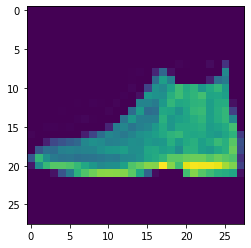

In [65]:
plt.imshow(x_test[0])
plt.show()

In [66]:
#Model kayit

In [67]:
model.save = ('keras_fashion_mnist_trained.model')